In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
inp0= pd.read_csv("bank_marketing_updated_v1.csv")

In [4]:
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


## Data Cleaning


In [5]:
inp0= pd.read_csv("bank_marketing_updated_v1.csv",skiprows=2)
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dropping Customer Id column

In [6]:
inp0.drop('customerid',axis=1,inplace=True)
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### DIviding jobedu into Job and Edu

In [7]:
inp0['job']= inp0.jobedu.apply(lambda x:x.split(",")[0])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [8]:
inp0['education']= inp0.jobedu.apply(lambda x:x.split(",")[1])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [9]:
inp0.drop('jobedu',axis=1,inplace=True)
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


### Extract value of month from 'month'

In [97]:
inp0['month']= inp0.month.apply(lambda x: x.split(',')[0])
inp0.head()

AttributeError: 'float' object has no attribute 'split'

In [11]:
inp0[inp0.month.apply(lambda x: isinstance(x,float))==True]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49.0,16000,164,divorced,yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26.0,60000,3825,married,yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38.0,50000,446,single,no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48.0,120000,2550,married,no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41.0,20000,59,married,yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


### checking for missing values

In [12]:
inp0.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

### Handling Missing Values

In [13]:
inp0['age'].isnull().sum()

20

In [14]:
inp0.shape

(45211, 19)

In [15]:
100*20/45211

0.04423702196368141

### Drop Records with age missing

In [16]:
inp1 = inp0[~inp0.age.isnull()].copy()
inp1.shape

(45191, 19)

In [17]:
inp1.age.isnull().sum()

0

### Handling Missing Month

In [18]:
inp0['month'].isnull().sum()

50

In [19]:
inp1.month.value_counts(normalize=True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [20]:
month_mode = inp1.month.mode()[0]
month_mode

'may, 2017'

In [21]:
inp1.month.fillna(month_mode, inplace=True)

In [22]:
inp1.month.value_counts(normalize=True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [23]:
inp1.month.isnull().sum()

0

In [24]:
inp1.pdays.describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

#### -1 indicates missing values

##### These -1 should be ignored and should be kept as NaN, because it is actually should be 0 or blank.

In [25]:
inp1.loc[inp1.pdays<0,"pdays"]=np.NaN
inp1.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

**Missing Values always doesnt have to be present as null

In [26]:
len(inp1.isnull().sum())/len(inp1.response)

0.0004204376977716802

## Outlier handling

In [27]:
inp1.age.describe()

count    45191.000000
mean        40.935651
std         10.619198
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

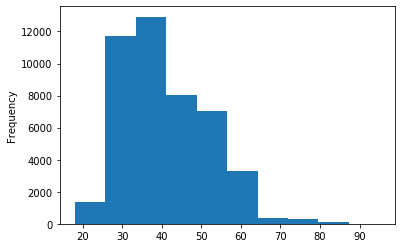

In [28]:
inp1.age.plot.hist()
plt.show()

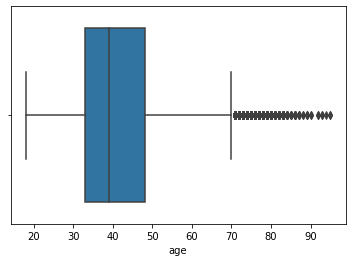

In [29]:
sns.boxplot(inp1.age)
plt.show()

### Check Balance variable

In [30]:
inp1.balance.describe()

count     45191.000000
mean       1362.432520
std        3045.120417
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

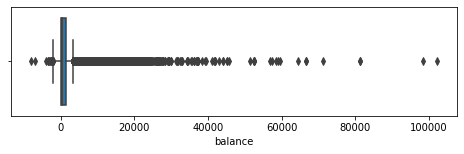

In [31]:
plt.figure(figsize=[8,2])
sns.boxplot(inp1.balance)
plt.show()

In [32]:
inp1.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5768.0
0.99    13167.1
Name: balance, dtype: float64

In [33]:
inp1[inp1.balance>15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,62.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,188.516129,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,118.796388,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,31.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,96.250000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,167.500000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,246.500000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


#### Instead of looking at mean, we could look at quantiles/median/percentiles

In [34]:
inp1.salary.describe()

count     45191.000000
mean      57005.974641
std       32084.253154
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

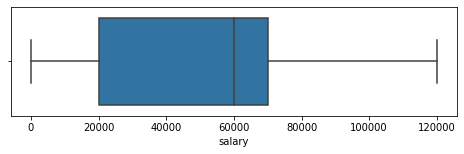

In [35]:
plt.figure(figsize=[8,2])
sns.boxplot(inp1.salary)
plt.show()

In [36]:
inp1.balance.quantile([0.5,0.7,0.9,0.95,0.99,1])

0.50       448.0
0.70      1126.0
0.90      3575.0
0.95      5768.0
0.99     13167.1
1.00    102127.0
Name: balance, dtype: float64

### Standardize variable

In [37]:
inp1.duration

0                     261 sec
1                     151 sec
2                      76 sec
3                      92 sec
4                     198 sec
                 ...         
45206    16.2833333333333 min
45207                 7.6 min
45208    18.7833333333333 min
45209    8.46666666666667 min
45210    6.01666666666667 min
Name: duration, Length: 45191, dtype: object

In [38]:
inp1.duration= inp1.duration.apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))

In [39]:
inp1.duration.describe()

count    45191.000000
mean         4.303030
std          4.292739
min          0.000000
25%          1.716667
50%          3.000000
75%          5.316667
max         81.966667
Name: duration, dtype: float64

In [40]:
inp1.marital.value_counts()

married     27204
single      12786
divorced     5201
Name: marital, dtype: int64

In [41]:
inp1.marital.value_counts(normalize=True)

married     0.601978
single      0.282932
divorced    0.115089
Name: marital, dtype: float64

<function matplotlib.pyplot.show(*args, **kw)>

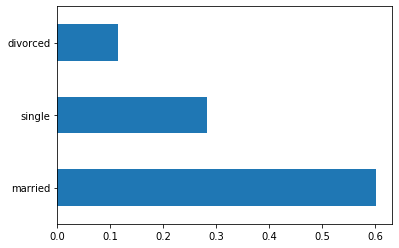

In [42]:
inp1.marital.value_counts(normalize=True).plot.barh()
plt.show

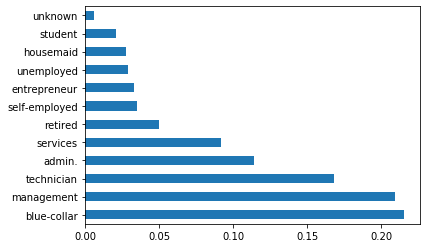

In [43]:
inp1.job.value_counts(normalize= True).plot.barh()

plt.show()

In [44]:
inp1['job'].value_counts(normalize=True)

blue-collar      0.215242
management       0.209223
technician       0.168042
admin.           0.114403
services         0.091877
retired          0.050076
self-employed    0.034918
entrepreneur     0.032861
unemployed       0.028811
housemaid        0.027417
student          0.020756
unknown          0.006373
Name: job, dtype: float64

#### Education Variable

In [45]:
inp1.education.value_counts(normalize=True)

secondary    0.513222
tertiary     0.294196
primary      0.151490
unknown      0.041092
Name: education, dtype: float64

In [46]:
inp1.education.value_counts()

secondary    23193
tertiary     13295
primary       6846
unknown       1857
Name: education, dtype: int64

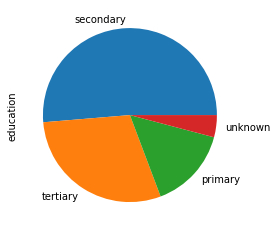

In [47]:
inp1.education.value_counts(normalize=True).plot.pie()
plt.show()

#### Poutcome variable

In [48]:
inp1.poutcome.value_counts(normalize=True)

unknown    0.817508
failure    0.108384
other      0.040716
success    0.033392
Name: poutcome, dtype: float64

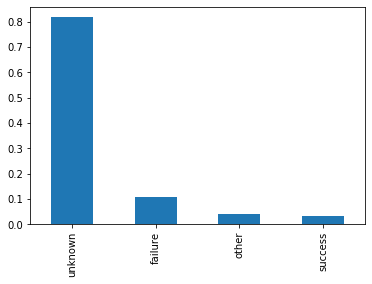

In [49]:
inp1.poutcome.value_counts(normalize=True).plot.bar()
plt.show()

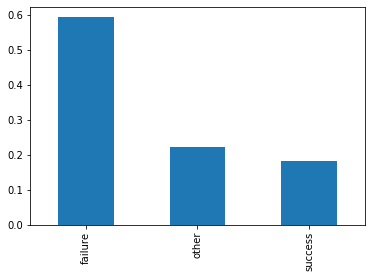

In [50]:
inp1[~(inp1.poutcome == 'unknown')].poutcome.value_counts(normalize=True).plot.bar()
plt.show()

### Response- The Target Variable

In [51]:
inp1.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

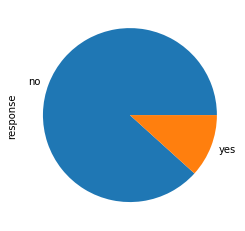

In [52]:
inp1.response.value_counts(normalize=True).plot.pie()
plt.show()

### Bi-Variate Analysis

#### Numerical-Numerical

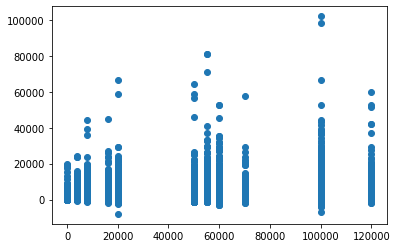

In [53]:
plt.scatter(inp1.salary,inp1.balance)
plt.show()

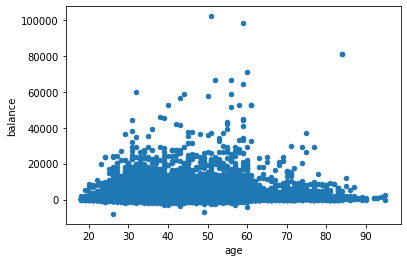

In [54]:
inp1.plot.scatter(x='age',y='balance')
plt.show()

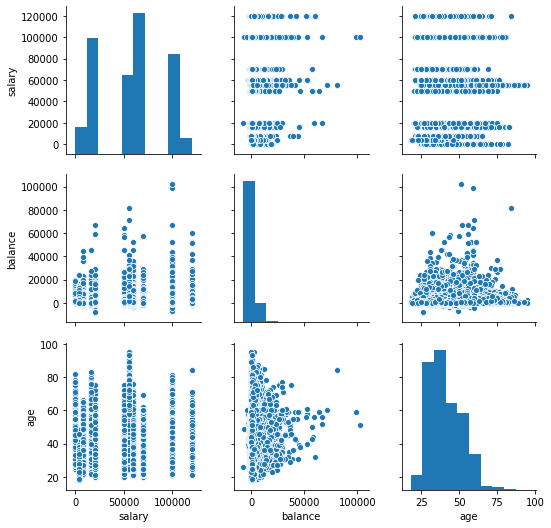

In [55]:
sns.pairplot(data=inp1,vars = ['salary','balance','age'])
plt.show()

### Quantify using Corelation

In [56]:
inp1[['age','salary','balance']].corr()

,age,salary,balance
age,1.000000,0.024374,0.097755
salary,0.024374,1.000000,0.055505
balance,0.097755,0.055505,1.000000


#### Corelation Heat Map

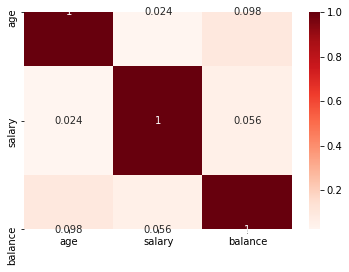

In [57]:
sns.heatmap(inp1[['age','salary','balance']].corr(), annot=True, cmap="Reds")
plt.show()

### Categorical to Numerical

In [58]:
inp1.groupby('response')['salary'].mean()

response
no     56769.510482
yes    58780.510880
Name: salary, dtype: float64

In [59]:
inp1.groupby('response')['salary'].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

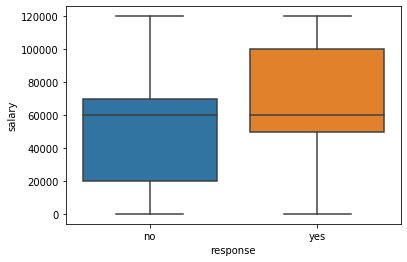

In [60]:
sns.boxplot(data=inp1, x='response',y='salary')
plt.show()

#### Response vs Balance
we know that Balance is highly skewed- has very high values.

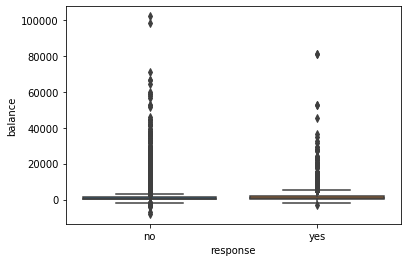

In [61]:
sns.boxplot(data=inp1, x='response',y='balance')
plt.show()

###### Not much to conclude from above box plot

In [62]:
inp1.groupby('response')['balance'].mean()

response
no     1304.292281
yes    1804.681362
Name: balance, dtype: float64

In [63]:
inp1.groupby('response')['balance'].median()

response
no     417
yes    733
Name: balance, dtype: int64

#### 75th Percentile

In [64]:
def p75(x):
    return np.quantile(x,0.75)

In [65]:
inp1.groupby('response')['balance'].aggregate(["mean","median",p75])

,mean,median,p75
response,,,
no,1304.292281,417,1345
yes,1804.681362,733,2159


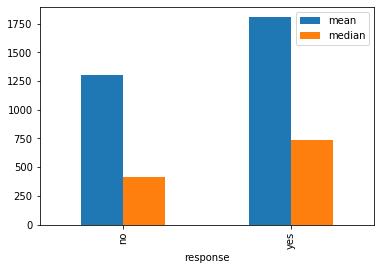

In [66]:
inp1.groupby('response')['balance'].aggregate(["mean","median"]).plot.bar()
plt.show()

In [67]:
inp1.groupby('education')['salary'].aggregate(["mean","median",p75])

,mean,median,p75
education,,,
primary,34224.510663,20000,55000
secondary,49736.127280,55000,60000
tertiary,82878.300113,100000,100000
unknown,46558.427571,50000,70000


In [68]:
inp1.groupby('job')['salary'].mean()

job
admin.            50000
blue-collar       20000
entrepreneur     120000
housemaid         16000
management       100000
retired           55000
self-employed     60000
services          70000
student            4000
technician        60000
unemployed         8000
unknown               0
Name: salary, dtype: int64

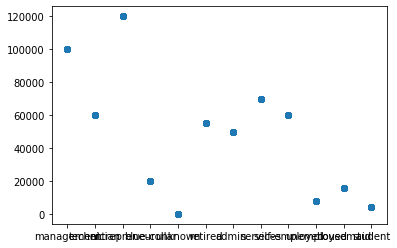

In [69]:
plt.scatter(data=inp1,x='job',y='salary')
plt.show()

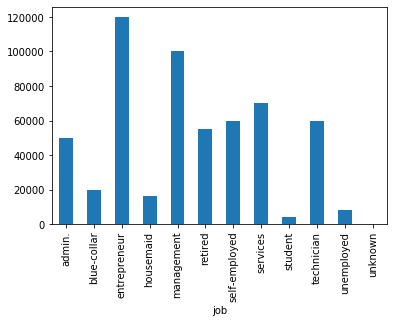

In [70]:
inp1.groupby('job')['salary'].mean().plot.bar()

### Categorical - Categorical

In [71]:
inp1['response_flag']=np.where(inp1.response=='yes',1,0)

In [72]:
inp1.response_flag.value_counts()

0    39906
1     5285
Name: response_flag, dtype: int64

In [73]:
inp1.response.value_counts()

no     39876
yes     5285
Name: response, dtype: int64

In [74]:
inp1.response.value_counts(normalize=True)

no     0.882974
yes    0.117026
Name: response, dtype: float64

In [75]:
inp1.response_flag.mean()

0.11694806488017526

#### Education Vs Response Rate

In [76]:
inp1.groupby('education')['response_flag'].mean()

education
primary      0.086328
secondary    0.105549
tertiary     0.149981
unknown      0.135703
Name: response_flag, dtype: float64

#### Marital vs Response Rate

In [77]:
inp1.groupby('marital')['response_flag'].mean()

marital
divorced    0.119400
married     0.101198
single      0.149460
Name: response_flag, dtype: float64

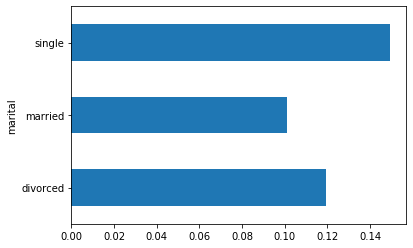

In [78]:
inp1.groupby('marital')['response_flag'].mean().plot.barh()
plt.show()

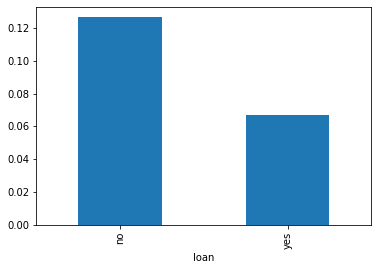

In [79]:
inp1.groupby('loan')['response_flag'].mean().plot.bar()
plt.show()

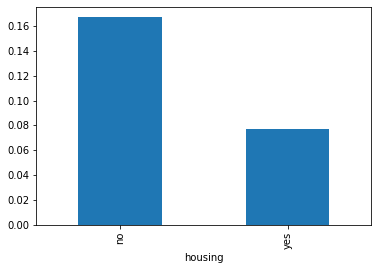

In [80]:
inp1.groupby('housing')['response_flag'].mean().plot.bar()
plt.show()

#### Age vs Response Rate

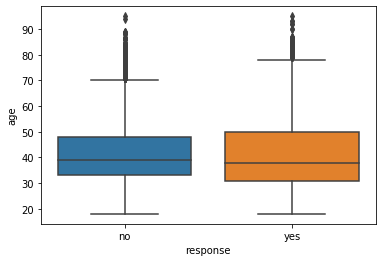

In [81]:
sns.boxplot(data=inp1,y='age',x='response')
plt.show()

#### Making buckets on the Age Coloumn or Binning

In [82]:
?pd.cut

In [83]:
#pd.cut(inp1.age[:5],[0,30,40,50,60,9999],labels=["<30","30-40","40-50","50-60","60+"])

In [84]:
inp1.age.head()

0    58.0
1    44.0
2    33.0
3    47.0
4    33.0
Name: age, dtype: float64

In [85]:
                        inp1['age_group'] = pd.cut(inp1.age,[0,30,40,50,60,9999],labels=["<30","30-40","40-50","50-60","60+"])

In [86]:
inp1['age_group'].value_counts(normalize=True)

30-40    0.391206
40-50    0.248611
50-60    0.178376
<30      0.155518
60+      0.026288
Name: age_group, dtype: float64

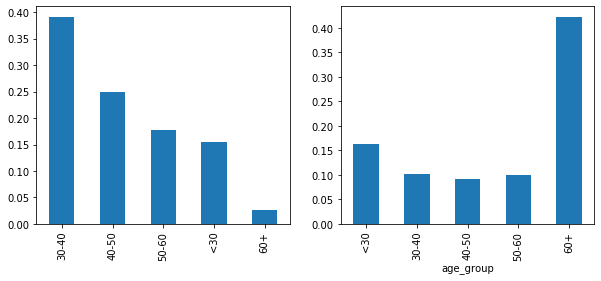

In [87]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp1['age_group'].value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
inp1.groupby('age_group')['response_flag'].mean().plot.bar()
plt.show()

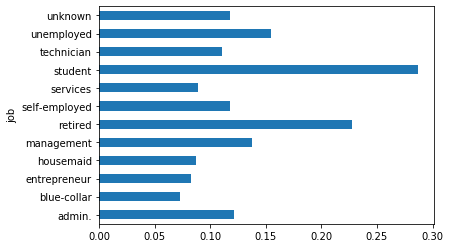

In [88]:
inp1.groupby('job')['response_flag'].mean().plot.barh()
plt.show()

### More than 2 Variables

In [89]:
res = pd.pivot_table(data=inp1,index = 'education', columns = 'marital',values = 'response_flag')

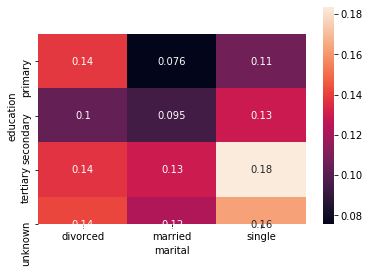

In [90]:
ax=sns.heatmap(res,annot=True)
ax.set_ylim(len(res)-0.5, -0.5)

plt.show()

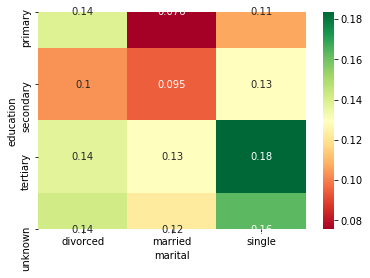

In [91]:
sns.heatmap(res,annot=True,cmap='RdYlGn')
plt.show()

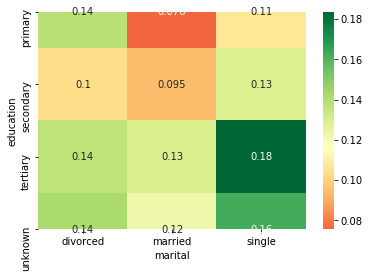

In [92]:
sns.heatmap(res,annot=True,cmap='RdYlGn', center = 0.117)
plt.show()

#### Job vs Marital Vs Response

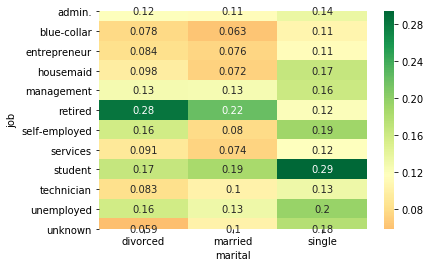

In [93]:
res = pd.pivot_table(data=inp1, index = 'job', columns='marital', values=  'response_flag')
sns.heatmap(res, annot=True,cmap='RdYlGn',center=0.117)
plt.show()

#### Education vs poutcome vs response

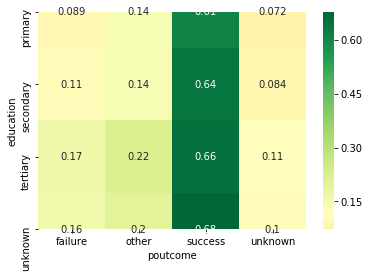

In [94]:
res = pd.pivot_table(data=inp1, index = 'education', columns='poutcome', values=  'response_flag')
sns.heatmap(res, annot=True,cmap='RdYlGn',center=0.117)
plt.show()

In [95]:
inp1[inp1.pdays>0].response_flag.mean()

0.23061076102762967

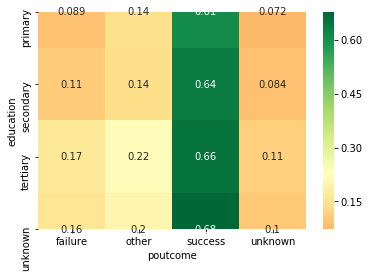

In [96]:
res = pd.pivot_table(data=inp1, index = 'education', columns='poutcome', values=  'response_flag')
sns.heatmap(res, annot=True,cmap='RdYlGn',center=0.2306)
plt.show()